# <span style="color:#FE633D"> Surviving the Titanic: A Data Adventure with Supervised Machine Learning</span>  <a class="anchor"  id="top"></a>

The sinking of the RMS Titanic in 1912 is a well-known tragedy that claimed the lives of many passengers and crew members. Our objective is to build predictive models that can accurately determine whether a passenger survived or perished based on various features such as age, gender, ticket class, and more. By analyzing this dataset and applying supervised learning algorithms, we hope to gain valuable insights and unlock the secrets behind survival patterns.

We will start by understanding the dataset's structure and gaining insights into the available features. We will then proceed to select appropriate performance measures, check assumptions, conduct exploratory data analysis (EDA), and explore various supervised learning algorithms.

### <span style="color:#FE633D"> Framing the Problem: Predicting Titanic Survival</span>  <a class="anchor"  id="top"></a>
The problem we aim to solve is predicting whether a passenger on the Titanic survived or not. Given a set of input features such as age, gender, ticket class, and more, our goal is to build a model that can accurately classify passengers into two categories: those who survived and those who did not. By doing so, we can uncover the factors that played a significant role in determining survival and gain insights into the dynamics of the tragedy.


In [118]:
# Let's begin by importing the libraries

import pandas as pd ## to read the csv files
import numpy as np ## to perform numerical operations
import os ## to set the working directory
import matplotlib.pyplot as plt 
import seaborn as sns 

# Since we will be generating a lot of charts, let's ensure that all matplotlib charts are rendered within the ipython shell
%matplotlib inline 

# Let's avoid printing of warnings
import warnings
warnings.filterwarnings('ignore')



In [119]:
#Let's importing training data
titanic_data=pd.read_csv('../Data/train.csv')

In [120]:
#See top rows
titanic_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [121]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Here is a brief description of the columns:

- PassengerId: An unique identifier for each passenger. Type = int
- Survived: Whether the passenger survived or not (0 = No; 1 = Yes). Type = int
- Pclass: Passenger class (1 = 1st; 2 = 2nd; 3 = 3rd). Type = int
- Name: Name of the passenger. Type = string
- Sex: Gender of the passenger. Type = string
- Age: Age of the passenger. Type = float. Missing Values
- SibSp: Number of siblings/spouses aboard. Type = int
- Parch: Number of parents/children aboard. Type = int
- Ticket: Ticket number. Type = string
- Fare: Passenger fare. Type = float
- Cabin: Cabin number. Type = string. Missing values
- Embarked: Port of embarkation (C = Cherbourg; Q = Queenstown; S = Southampton). Type = string. Missing values

#### The Survived column is the target variable for this classification task.

In [122]:
titanic_data.shape

(891, 12)

Training Data has 891 rows and 12 columns

In [123]:
# Checking for missing values
titanic_data.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [124]:
# Getting summary statistics
titanic_data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PassengerId,891.0,NaN,NaN,NaN,446.0,257.353842,1.0,223.5,446.0,668.5,891.0
Survived,891.0,NaN,NaN,NaN,0.383838,0.486592,0.0,0.0,0.0,1.0,1.0
Pclass,891.0,NaN,NaN,NaN,2.308642,0.836071,1.0,2.0,3.0,3.0,3.0
Name,891,891,"Braund, Mr. Owen Harris",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,891,2,male,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,714.0,NaN,NaN,NaN,29.699118,14.526497,0.42,20.125,28.0,38.0,80.0
SibSp,891.0,NaN,NaN,NaN,0.523008,1.102743,0.0,0.0,0.0,1.0,8.0
Parch,891.0,NaN,NaN,NaN,0.381594,0.806057,0.0,0.0,0.0,0.0,6.0
Ticket,891,681,347082,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare,891.0,NaN,NaN,NaN,32.204208,49.693429,0.0,7.9104,14.4542,31.0,512.3292


#### Missing Values

The dataset contains missing values in the 'Age', 'Cabin', and 'Embarked' columns. Here's a summary:

- Age: 177 missing values. We can impute these missing values with a central tendency measure like the mean or median.
- Cabin: 687 missing values. This is a significant portion of the data. Considering the high number of missing values and the fact that cabin information may not be very important in predicting survival, we might consider dropping this column.
- Embarked: 2 missing values. We can impute these missing values with the most frequent category.

#### Summary Statistics
- PassengerId: It ranges from 1 to 891 and has no missing values. This column is just an ID field and is not likely to provide any predictive power for the model.
- Survived: This is the target variable with values 0 (did not survive) or 1 (survived). Approximately 38% of passengers in this dataset survived.
- Pclass: There are three classes of passengers (1, 2, 3) and no missing values.
- Name: All names are unique and there are no missing values. The name itself might not be useful for the model, but we can extract some features like title (Mr., Mrs., etc.) which could potentially be useful.
- Sex: There are two genders, male and female, with no missing values. There are more male passengers than female passengers in the dataset.
- Age: Ages range from 0.42 (around 5 months) to 80 years, with a mean age of around 30 years.
- SibSp and Parch: These columns indicate the number of siblings/spouses and parents/children aboard. Most of the passengers are travelling without family.
- Ticket: There are 681 unique ticket numbers. This column might not be very useful for the model due to its high cardinality and lack of clear categorization.
- Fare: The fare varies greatly among passengers, ranging from 0 to 512 with a mean of around 32. There are no missing values.
- Embarked: There are three embarkation ports with 2 missing values. Most of the passengers embarked from Southampton (S) and we can replace the missing values with 'S'

### <span style="color:#FE633D">Examining the Titanic Dataset : Distributions and Relationships</span>  <a class="anchor"  id="top"></a>


We have identified two variables that will require missing imputation. Age and Embarked. Let's do a quick distribution check.

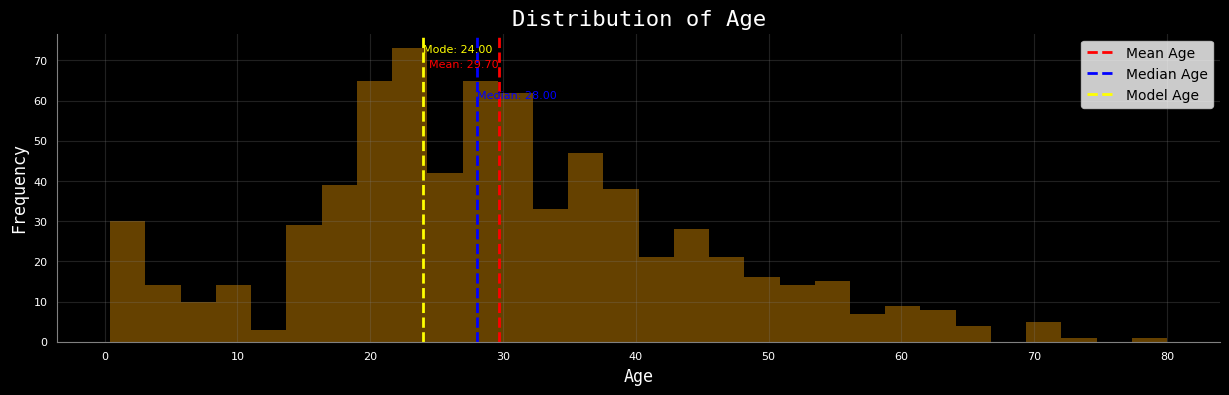

In [125]:
# Printing median, mean, and mode values
age_median = titanic_data['Age'].median()
age_mean = titanic_data['Age'].mean()
age_mode = titanic_data['Age'].mode()[0]

#plt.rcParams['text.color']='white' # changing the font color

# Plotting the distribution of age
fig, ax = plt.subplots(figsize=(15, 4))
sns.distplot(titanic_data['Age'].dropna(), kde=False, bins=30, color='orange')

# Adding title and axis labels
plt.title("Distribution of Age", color='white',fontsize=16,fontdict={'fontname': 'monospace'})
plt.xlabel("Age", color='white',fontsize=12,fontdict={'fontname': 'monospace'})
plt.ylabel("Frequency", color='white',fontsize=12,fontdict={'fontname': 'monospace'})

fig.set_facecolor('black')  # Changing the background color
ax.set_facecolor('black')  # Changing the plot area background color
ax.grid(color='gray', alpha=0.25)  # Changing the grid lines color

plt.axvline(age_mean, color='red', linestyle='--', linewidth=2, label='Mean Age')  # Adding a vertical line for mean
plt.text(age_mean, ax.get_ylim()[1]*0.9, f"Mean: {age_mean:.2f}", color='red', fontsize=8, ha='right', va='center')  # Adding text for mean
plt.axvline(age_median, color='blue', linestyle='--', linewidth=2, label='Median Age')  # Adding a vertical line for median
plt.text(age_median, ax.get_ylim()[1]*0.8, f"Median: {age_median:.2f}", color='blue', fontsize=8, ha='left', va='center')  # Adding text for median
plt.axvline(age_mode, color='yellow', linestyle='--', linewidth=2, label='Model Age')  # Adding a vertical line for mode
plt.text(age_mode, ax.get_ylim()[1]*0.95, f"Mode: {age_mode:.2f}", color='yellow', fontsize=8, ha='left', va='center')  # Adding text for mode


plt.yticks(color='white',fontsize=8) # Changing the font size of y-axis ticks
plt.xticks(color='white',fontsize=8) # Changing the font size of x-axis ticks

plt.setp(ax.spines.values(), color='gray') # Changing the color of the spines
sns.despine()  # Removing the top and right spines
plt.legend()  # Adding the legend
plt.show()  # Displaying the plot

(array([0, 1, 2]), [Text(0, 0, 'S'), Text(1, 0, 'C'), Text(2, 0, 'Q')])

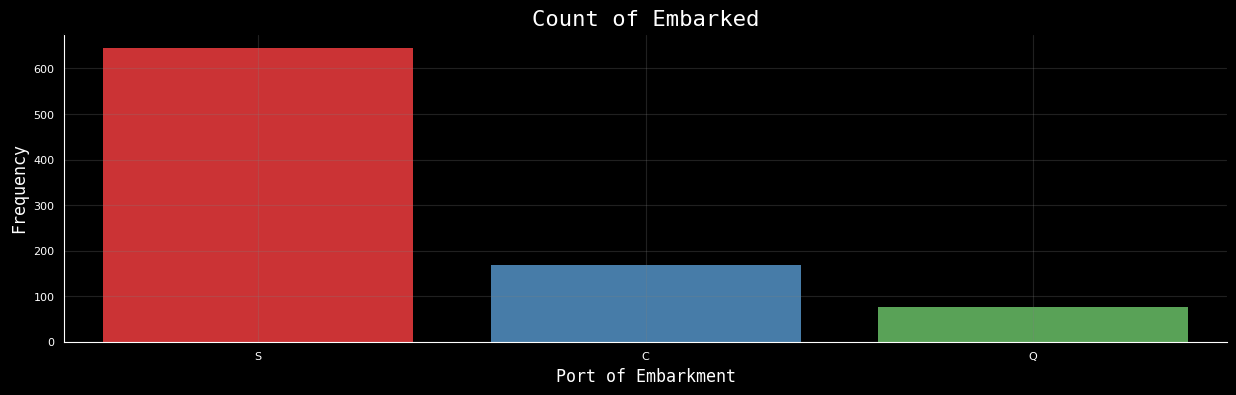

In [126]:
fig, ax = plt.subplots(figsize=(15, 4)) # Creating a figure and an axes

sns.countplot(x='Embarked', data=titanic_data, palette='Set1')  # Plotting the count plot for Survived attribute

plt.title("Count of Embarked", color='white',fontsize=16,fontdict={'fontname': 'monospace'})
plt.xlabel("Port of Embarkment", color='white',fontsize=12,fontdict={'fontname': 'monospace'})
plt.ylabel("Frequency", color='white',fontsize=12,fontdict={'fontname': 'monospace'})

fig.set_facecolor('black')  # Changing the background color
ax.set_facecolor('black')  # Changing the plot area background color
ax.grid(color='gray', alpha=0.25)  # Changing the grid lines color

ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')

plt.yticks(color='white',fontsize=8) # Changing the font size of y-axis ticks
plt.xticks(color='white',fontsize=8) # Changing the font size of x-axis ticks

We can confirm here that for - 
- Age, we will do a median imputation
- Embarked, we will do a top frequency imputation with the value 'S'

We can now do a quick univariate analysis for all other variables

In [127]:
def skew_cat(skew_val):
    if skew_val>0.5:
        return 'skewed towards the tail'
    elif skew_val<-.5:
        return 'skewed towards the head'
    else:
        return 'fairly symmetric'

def skew_chart(x,var):
    

    median = x[var].median()
    mean = x[var].mean()
    mode = x[var].mode()[0]
    max=x[var].max()

    # Plotting the distribution of age
    fig, ax = plt.subplots(figsize=(15, 4))
    sns.distplot(x[var].dropna(), kde=True, bins=30, color='orange')

    # Adding title and axis labels
    plt.title("Distribution of "+ str(var), color='white',fontsize=16,fontdict={'fontname': 'monospace'})
    plt.xlabel(var, color='white',fontsize=12,fontdict={'fontname': 'monospace'})
    plt.ylabel("Frequency", color='white',fontsize=12,fontdict={'fontname': 'monospace'})

    fig.set_facecolor('black')  # Changing the background color
    ax.set_facecolor('black')  # Changing the plot area background color
    ax.grid(color='gray', alpha=0.25)  # Changing the grid lines color

    plt.axvline(mean, color='lime', linestyle='--', linewidth=2, label='Mean')  # Adding a vertical line for mean
    plt.text(mean, ax.get_ylim()[1]*0.9, f"Mean: {mean:.2f}", color='lime', fontsize=8, ha='left', va='center')  # Adding text for mean
    plt.axvline(median, color='cyan', linestyle='--', linewidth=2, label='Median')  # Adding a vertical line for median
    plt.text(median, ax.get_ylim()[1]*0.8, f"Median: {median:.2f}", color='cyan', fontsize=8, ha='left', va='center')  # Adding text for median
    plt.axvline(mode, color='yellow', linestyle='--', linewidth=2, label='Mode')  # Adding a vertical line for mode
    plt.text(mode, ax.get_ylim()[1]*0.95, f"Mode: {mode:.2f}", color='yellow', fontsize=8, ha='left', va='center')  # Adding text for mode
    plt.text(max*.95, ax.get_ylim()[1]*0.5, f"Skew: {x[var].skew():.2f}", color='yellow', fontsize=8, ha='left', va='center')  # Adding text for mode
    plt.text(max*.95, ax.get_ylim()[1]*0.45, f"Distribution: {skew_cat(x[var].skew())}", color='yellow', fontsize=8, ha='left', va='center')  # Adding text for mode
    plt.yticks(color='white',fontsize=8) # Changing the font size of y-axis ticks
    plt.xticks(color='white',fontsize=8) # Changing the font size of x-axis ticks

    plt.setp(ax.spines.values(), color='gray') # Changing the color of the spines
    sns.despine()  # Removing the top and right spines
    plt.legend()  # Adding the legend
    plt.show()  # Displaying the plot

In [128]:
#creating list by type of variables
continuous=['Age','Fare'] # creating a list of continuous attributes
categorical=['Embarked','Pclass','Sex'] # creating a list of categorical attributes
ordinal=['SibSp','Parch'] # creating a list of ordinal attributes
target=['Survived'] # creating a list of target attribute

__Continuous Variables__

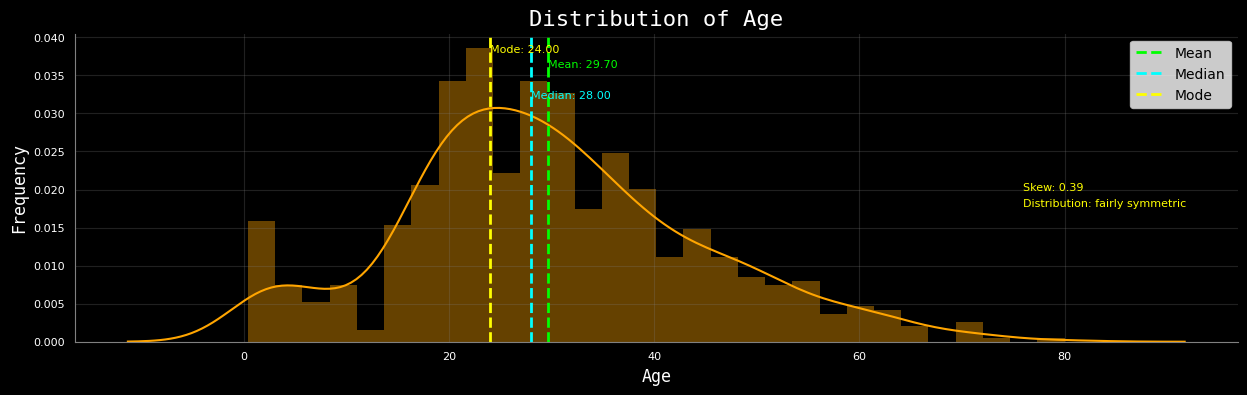

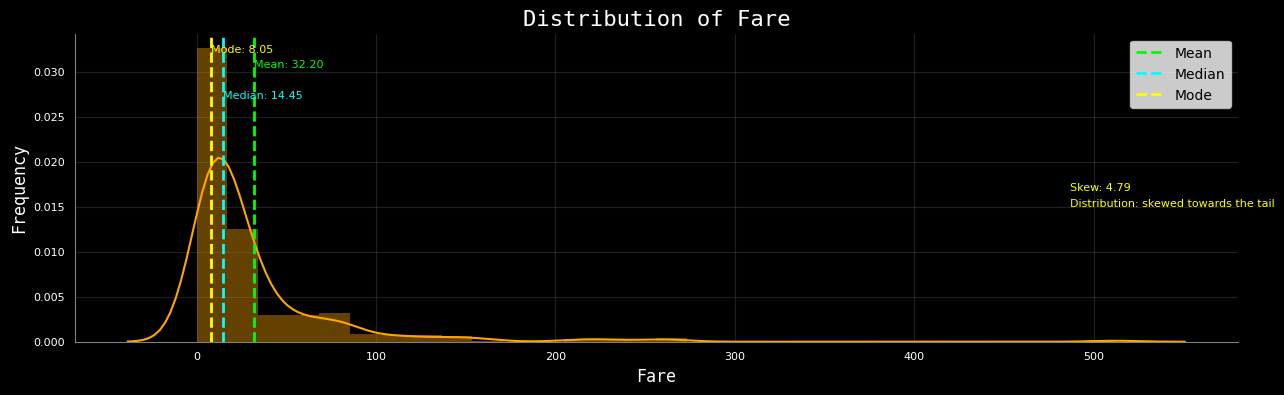

[None, None]

In [129]:
[skew_chart(titanic_data,i) for i in continuous]

- While Age is fairly symmetric, Fare seems to be clustered around the lower values.

- Let's try to see if we can address the skew in Fare by doing a log transformation

- We can also see a small cluster of age values between 0-10 indicating the presence of children

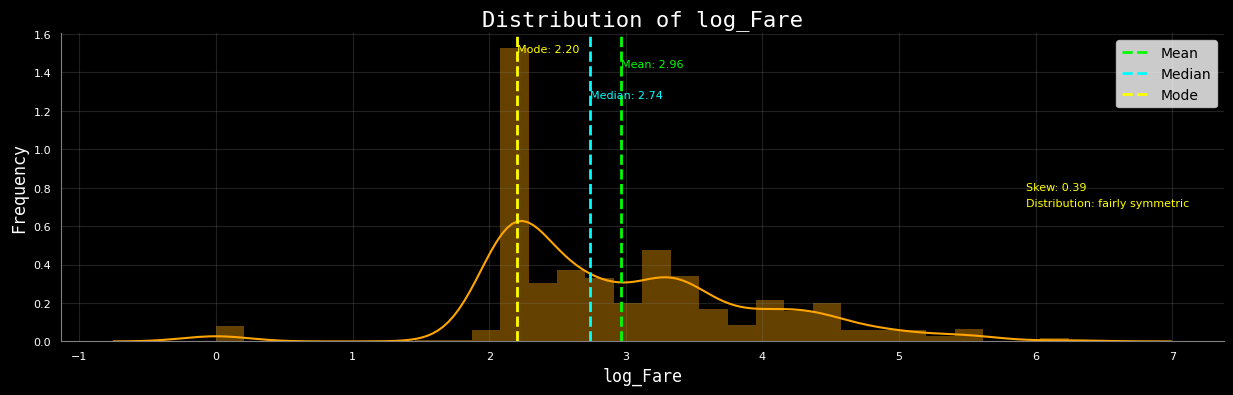

In [130]:
#log of Fare variable
titanic_data['log_Fare']=np.log(titanic_data['Fare']+1)
skew_chart(titanic_data,'log_Fare')

The log transformation does make the fare symmetric however the distribution is leptokurtic with a high concentration around the mode at 2.20

__Ordinal Variables__

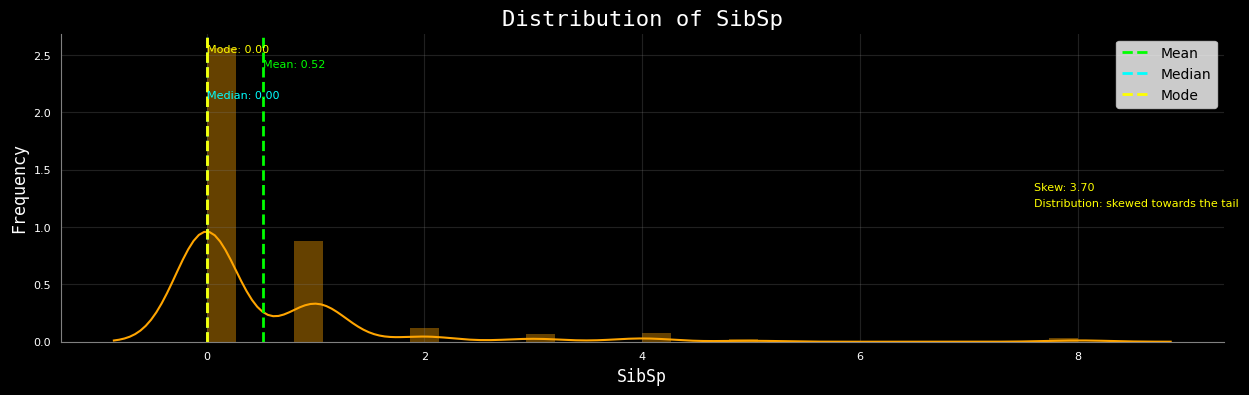

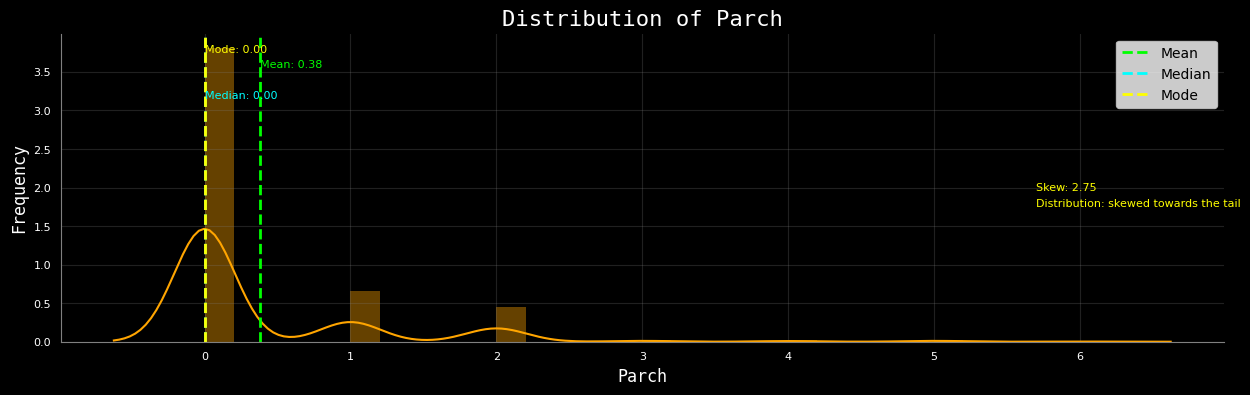

[None, None]

In [131]:
[skew_chart(titanic_data,i) for i in ordinal]

We can observe that both Sibling/Spouse and Parent/Children variables are __discrete__ and __a majority__ are __zero__

__Categorical Variables__

In [132]:
def cnt_plot(x,var):    
    fig, ax = plt.subplots(figsize=(15, 4)) # Creating a figure and an axes

    
    total = len(x)
    value_counts = pd.Series(x[var]).value_counts().sort_values()
    percentages = value_counts / total * 100
    category_order = value_counts.index

    sns.countplot(x=var, data=x, order=category_order, palette='Set1')  # Plotting the count plot for Survived attribute


    plt.title("Count of "+str(var), color='white',fontsize=16,fontdict={'fontname': 'monospace'})
    plt.xlabel(var, color='white',fontsize=12,fontdict={'fontname': 'monospace'})
    plt.ylabel("Frequency", color='white',fontsize=12,fontdict={'fontname': 'monospace'})

    fig.set_facecolor('black')  # Changing the background color
    ax.set_facecolor('black')  # Changing the plot area background color
    ax.grid(color='gray', alpha=0.25)  # Changing the grid lines color

    ax.spines['bottom'].set_color('white')
    ax.spines['left'].set_color('white')

    x=0
    for i in percentages.index:
        count = value_counts[i]
        ax.text(x, count+10, f"{percentages[i]:.1f}%", color='white', ha='center')
        x+=1

    plt.yticks(color='white',fontsize=8) # Changing the font size of y-axis ticks
    plt.xticks(color='white',fontsize=8) # Changing the font size of x-axis ticks

[None, None, None]

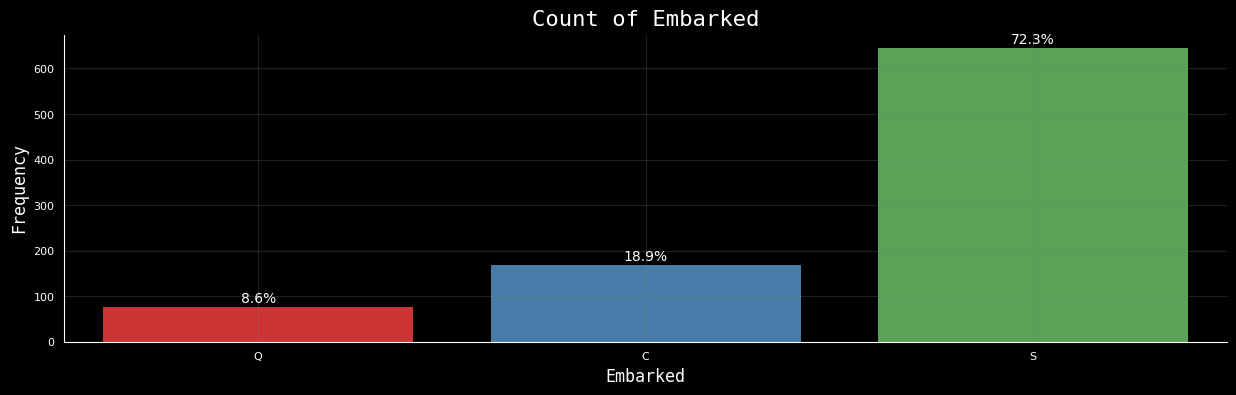

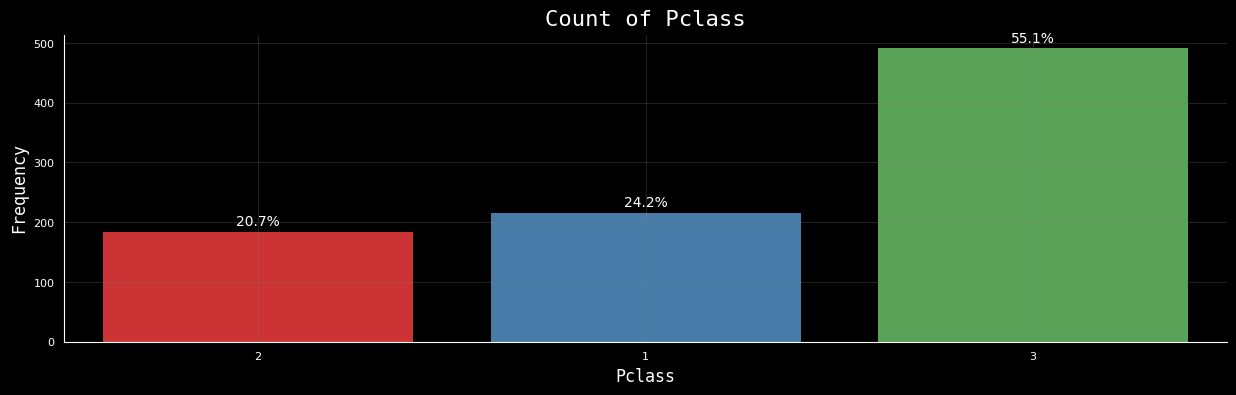

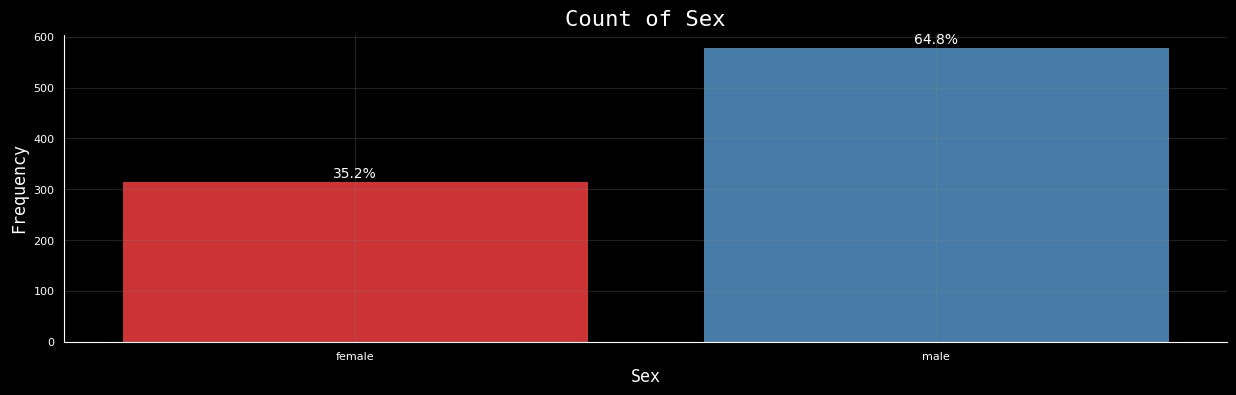

In [133]:
[cnt_plot(titanic_data,i) for i in categorical]

- We observe that __S(Southampton)__ is the most embarked port by far with __72%__

- Also, about __2/3rd__ of the passengers were __male__

- __More than half__ of the passengers travelled in __third class__ with others almost equally divided between first and second class

[None, None]

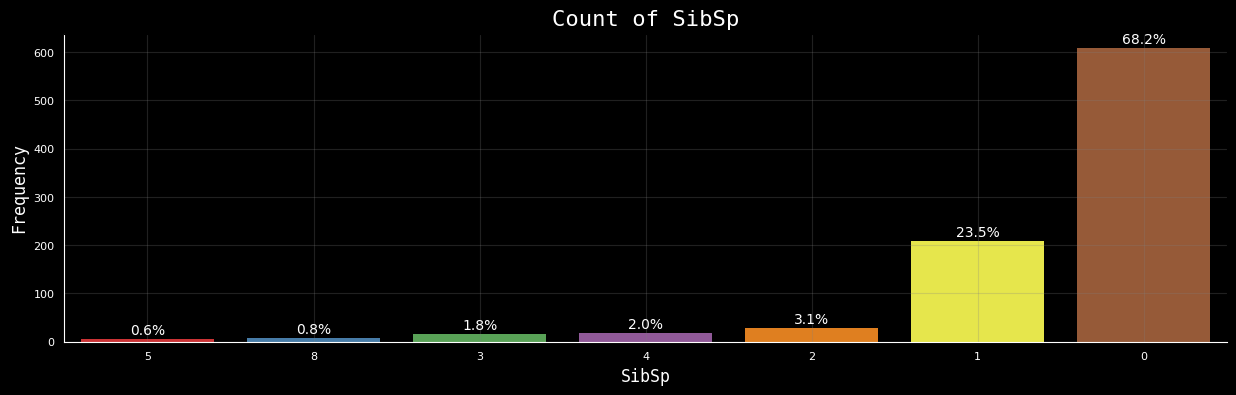

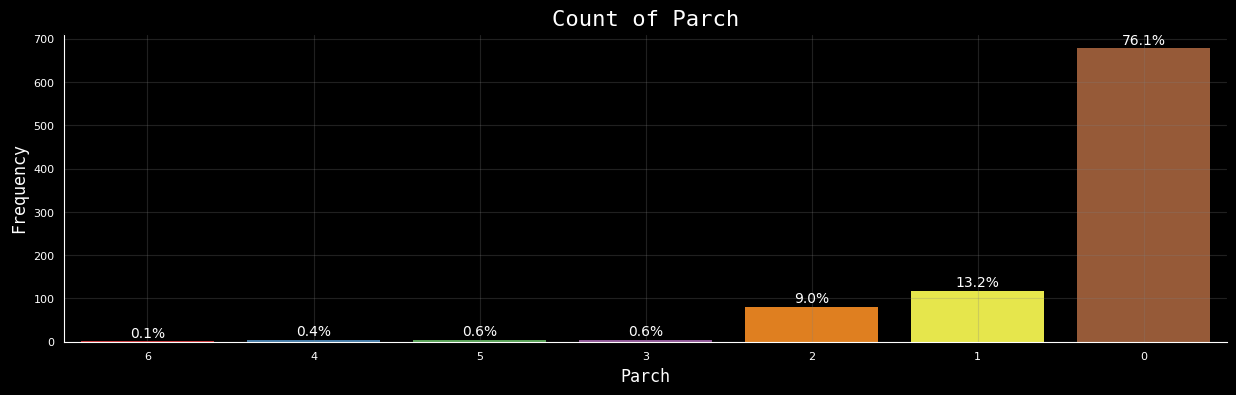

In [134]:
[cnt_plot(titanic_data,i) for i in ordinal]

- About __1 in 4 passengers__ were accompanied by a Parent or a Child

- About __1 in 5 passengers__ were accompanies by a Sibling or a Spouse

- It is plausible that these two ordinal variables should be used as categorical variables and values above 2 (or 1) be clubbed

__Target variable__

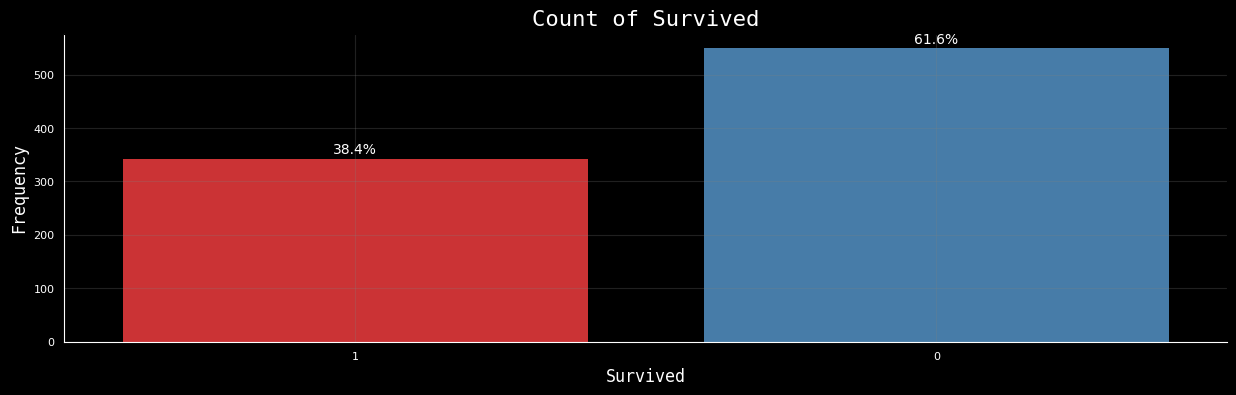

In [135]:
cnt_plot(titanic_data,'Survived')

- The ratio of __Survived:Did Not Survive__ is about __2:3__

- This implies that the target class is __not severely imbalanced__ hence we will __not__ have to balance the data

__Bivariate Relationships__

We've already seen a count plot of 'Survived' to show the distribution of the target variable.
Let's explore - 
- Bar plots of categorical variables ('Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked') against 'Survived' to show the relationship between these features and survival.
- Histograms of numerical variables ('Age', 'Fare') split by 'Survived' to show the distribution of these features for survivors and non-survivors.
- A correlation matrix of the numerical variables to show how these features are related to each other.

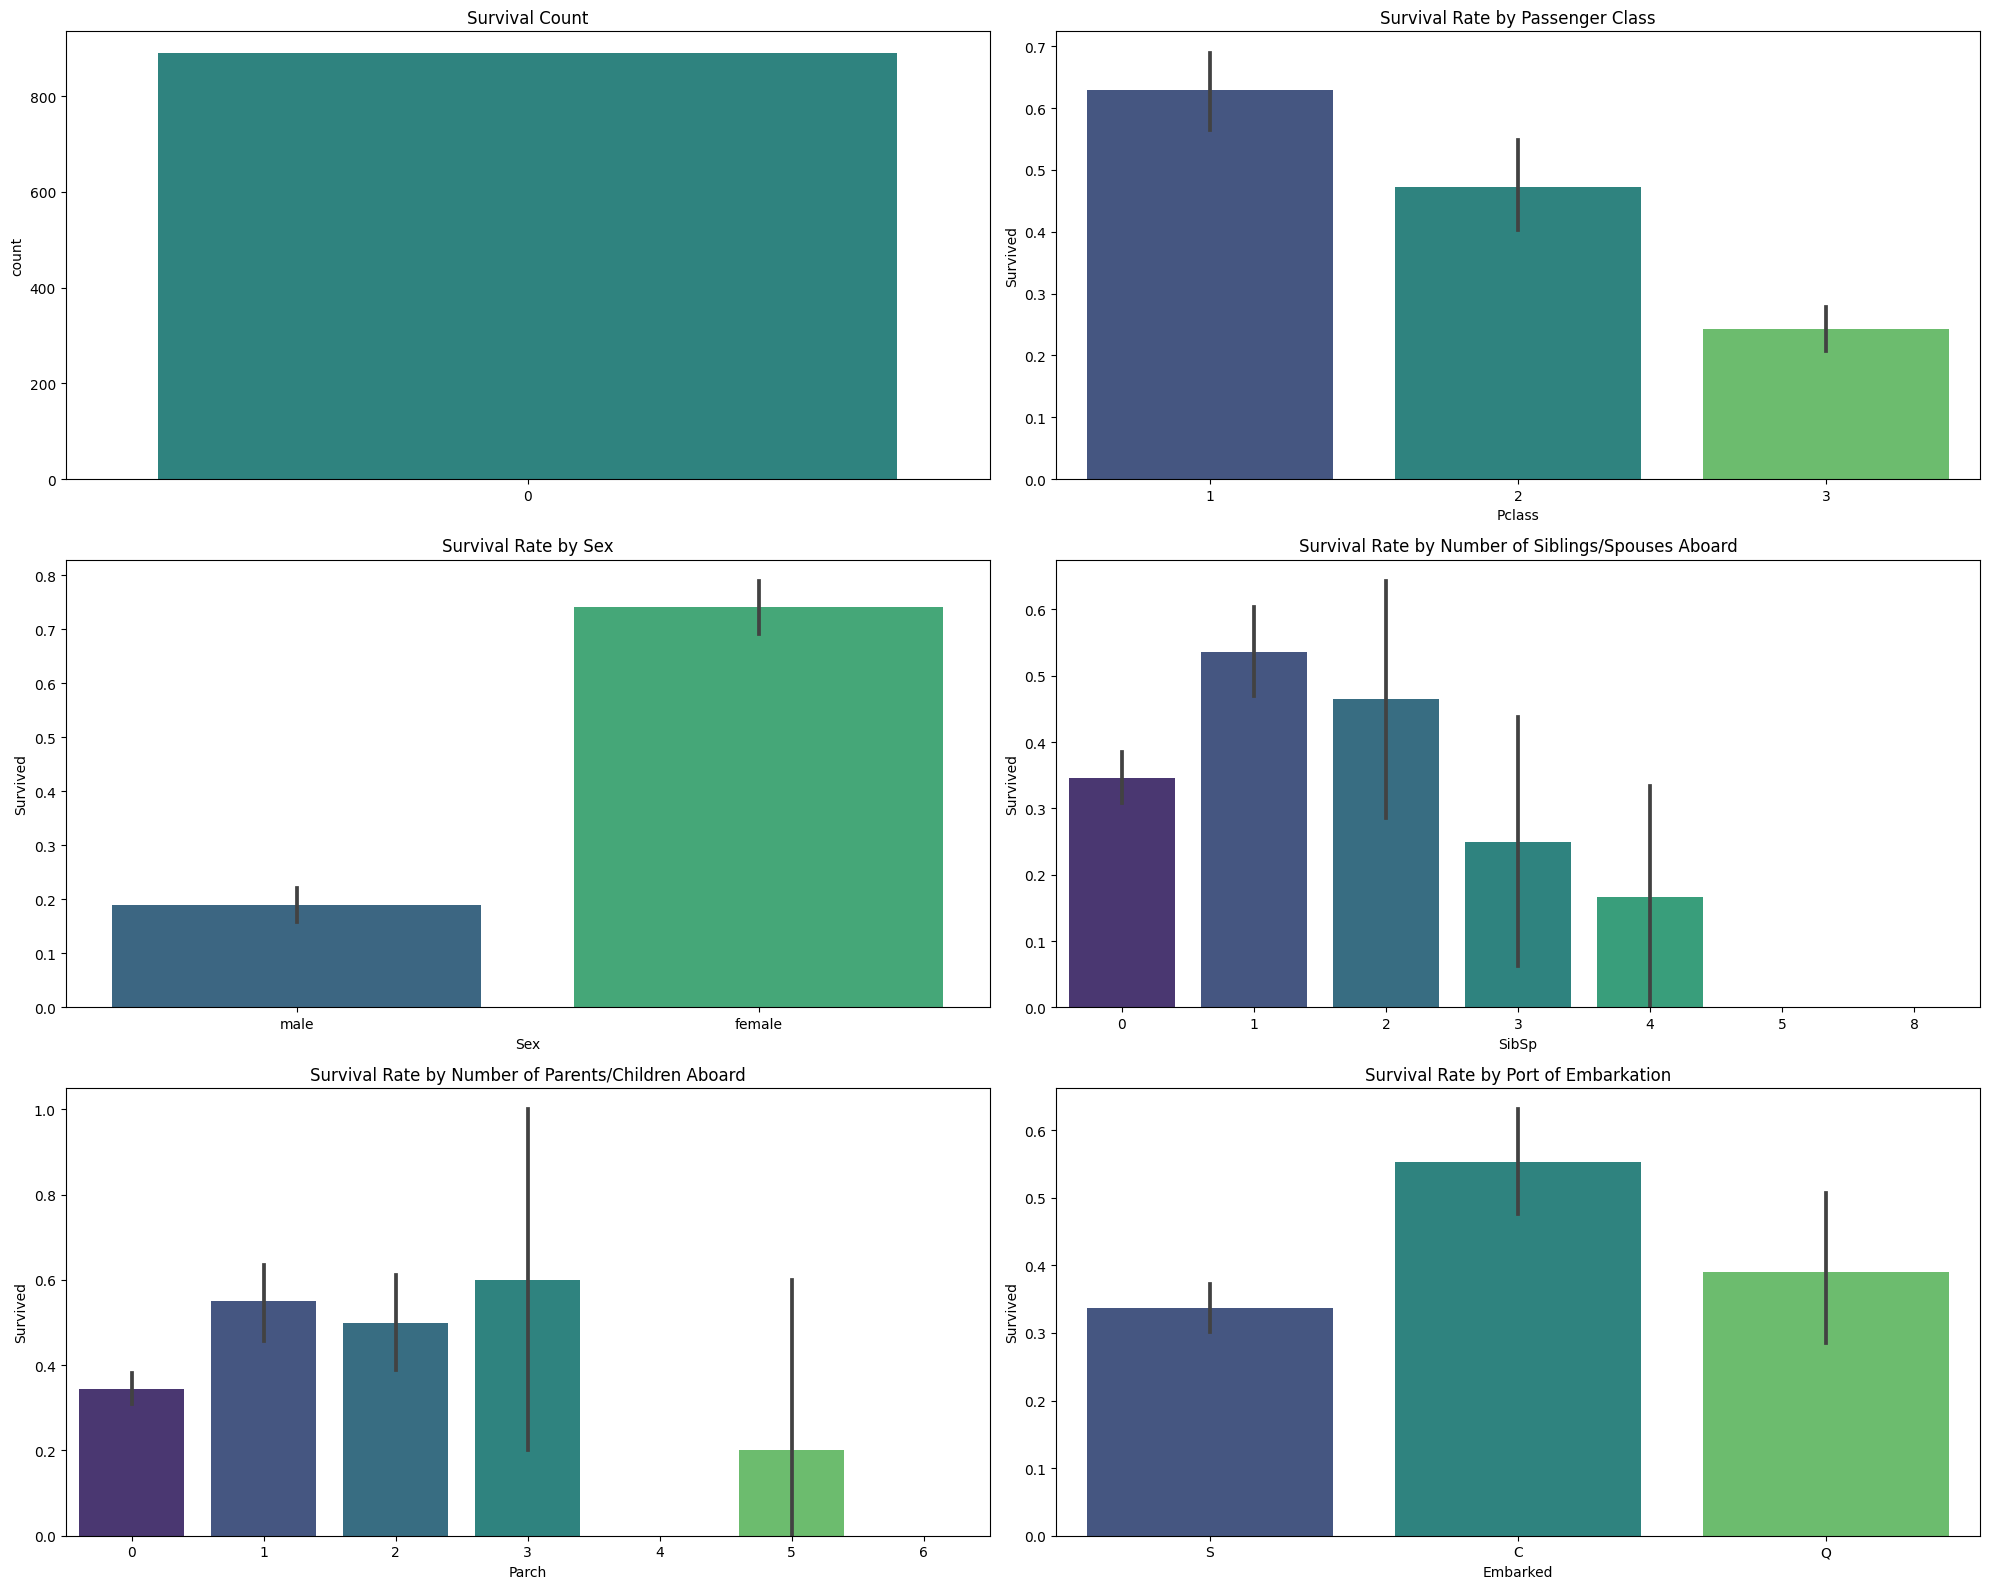

In [136]:
# Set up a grid of plots
fig = plt.figure(figsize=(20, 16)) 
fig_dims = (3, 2)

# Plot survival count
plt.subplot2grid(fig_dims, (0, 0))
sns.countplot(titanic_data['Survived'], palette='viridis')
plt.title('Survival Count')

# Plot Pclass vs Survived
plt.subplot2grid(fig_dims, (0, 1))
sns.barplot(x='Pclass', y='Survived', data=titanic_data, palette='viridis')
plt.title('Survival Rate by Passenger Class')

# Plot Sex vs Survived
plt.subplot2grid(fig_dims, (1, 0))
sns.barplot(x='Sex', y='Survived', data=titanic_data, palette='viridis')
plt.title('Survival Rate by Sex')

# Plot SibSp vs Survived
plt.subplot2grid(fig_dims, (1, 1))
sns.barplot(x='SibSp', y='Survived', data=titanic_data, palette='viridis')
plt.title('Survival Rate by Number of Siblings/Spouses Aboard')

# Plot Parch vs Survived
plt.subplot2grid(fig_dims, (2, 0))
sns.barplot(x='Parch', y='Survived', data=titanic_data, palette='viridis')
plt.title('Survival Rate by Number of Parents/Children Aboard')

# Plot Embarked vs Survived
plt.subplot2grid(fig_dims, (2, 1))
sns.barplot(x='Embarked', y='Survived', data=titanic_data, palette='viridis')
plt.title('Survival Rate by Port of Embarkation')

plt.tight_layout()
plt.show()


- Survival Rate by Passenger Class (Pclass): Passengers in higher classes (Class 1) had a higher survival rate.
- Survival Rate by Sex: Females had a significantly higher survival rate than males.
- Survival Rate by Number of Siblings/Spouses Aboard (SibSp): Passengers with one sibling or spouse aboard had the highest survival rate.
- Survival Rate by Number of Parents/Children Aboard (Parch): Passengers with one to three family members (either parents or children) aboard had a higher survival rate.
- Survival Rate by Port of Embarkation (Embarked): Passengers who embarked from Cherbourg (C) had the highest survival rate.

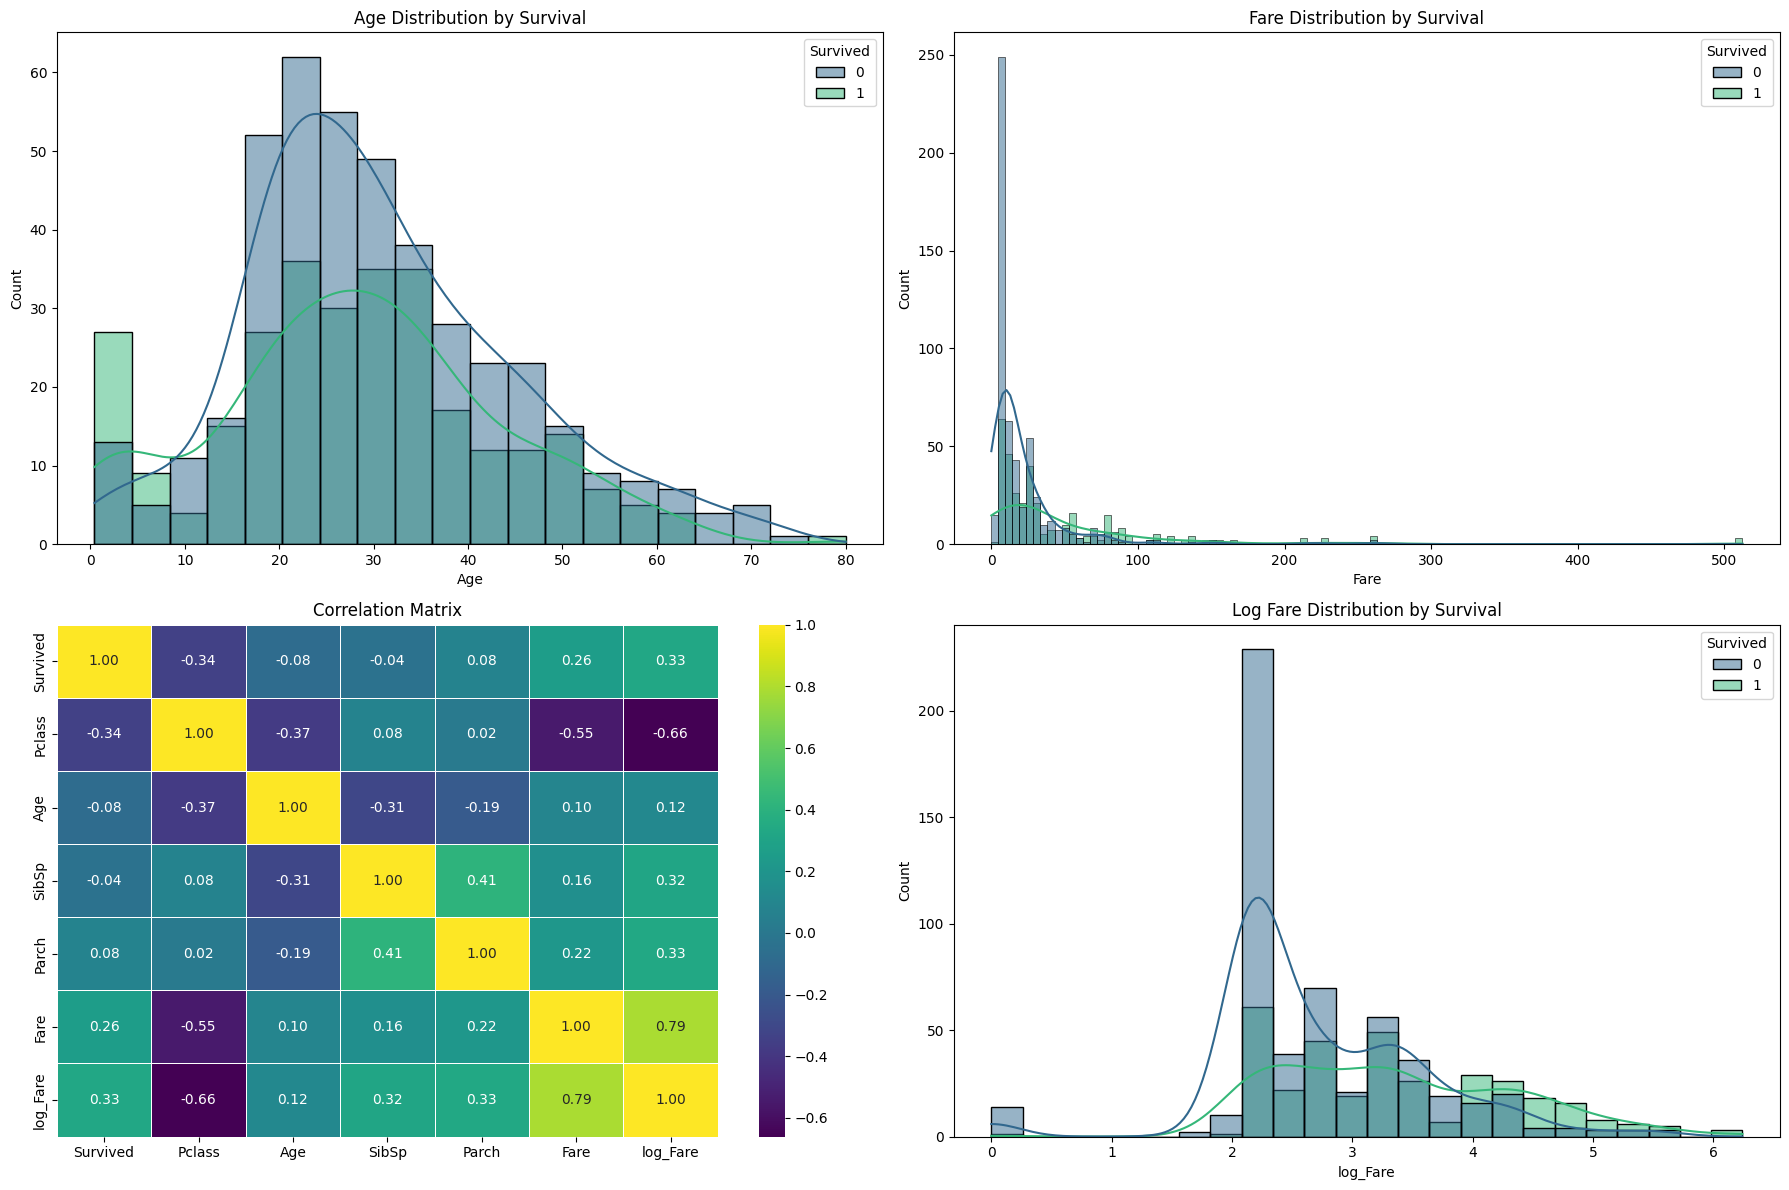

In [137]:
# Set up a grid of plots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 12))

# Plot Age distribution for Survived and Not Survived
sns.histplot(data=titanic_data, x='Age', hue='Survived', kde=True, ax=axes[0, 0], palette='viridis')
axes[0, 0].set_title('Age Distribution by Survival')

# Plot Fare distribution for Survived and Not Survived
sns.histplot(data=titanic_data, x='Fare', hue='Survived', kde=True, ax=axes[0, 1], palette='viridis')
axes[0, 1].set_title('Fare Distribution by Survival')

# Plot log Fare distribution for Survived and Not Survived
sns.histplot(data=titanic_data, x='log_Fare', hue='Survived', kde=True, ax=axes[1, 1], palette='viridis')
axes[1, 1].set_title('Log Fare Distribution by Survival')

# Correlation matrix
corr = titanic_data[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'log_Fare']].corr()
sns.heatmap(corr, annot=True, fmt=".2f", linewidths=.5, ax=axes[1, 0], cmap='viridis')
axes[1, 0].set_title('Correlation Matrix')


plt.tight_layout()
plt.show()

The histograms and correlation matrix provide the following insights:

- Age Distribution by Survival: The age distributions for survivors and non-survivors are somewhat similar. However, one noticeable difference is that a higher proportion of young passengers (age < ~10) survived.

- Fare/Log_Fare Distribution by Survival: Passengers who paid a higher fare were more likely to survive. This is consistent with the earlier observation that passengers in higher classes (which would likely correspond to higher fares) had a higher survival rate.

__Correlation Matrix__: The correlation matrix shows how each of these numerical features are related to each other. The target variable 'Survived' has a positive correlation with 'Fare' and a negative correlation with 'Pclass', which is consistent with our earlier observations. The other variables show weak correlation with 'Survived'.

#### Feature Engineering

Next, let's do some feature engineering:

- Title: We can extract the title from the 'Name' column and create a new 'Title' feature.
- FamilySize: We can combine 'SibSp' and 'Parch' into a 'FamilySize' feature that indicates the total number of family members aboard for a passenger.
- AgeGroup: We can categorize 'Age' into various age groups to convert it from a numerical variable to a categorical one.
- FareBin: Similarly, we can categorize 'Fare' into different fare bins to convert it from a numerical variable to a categorical one.

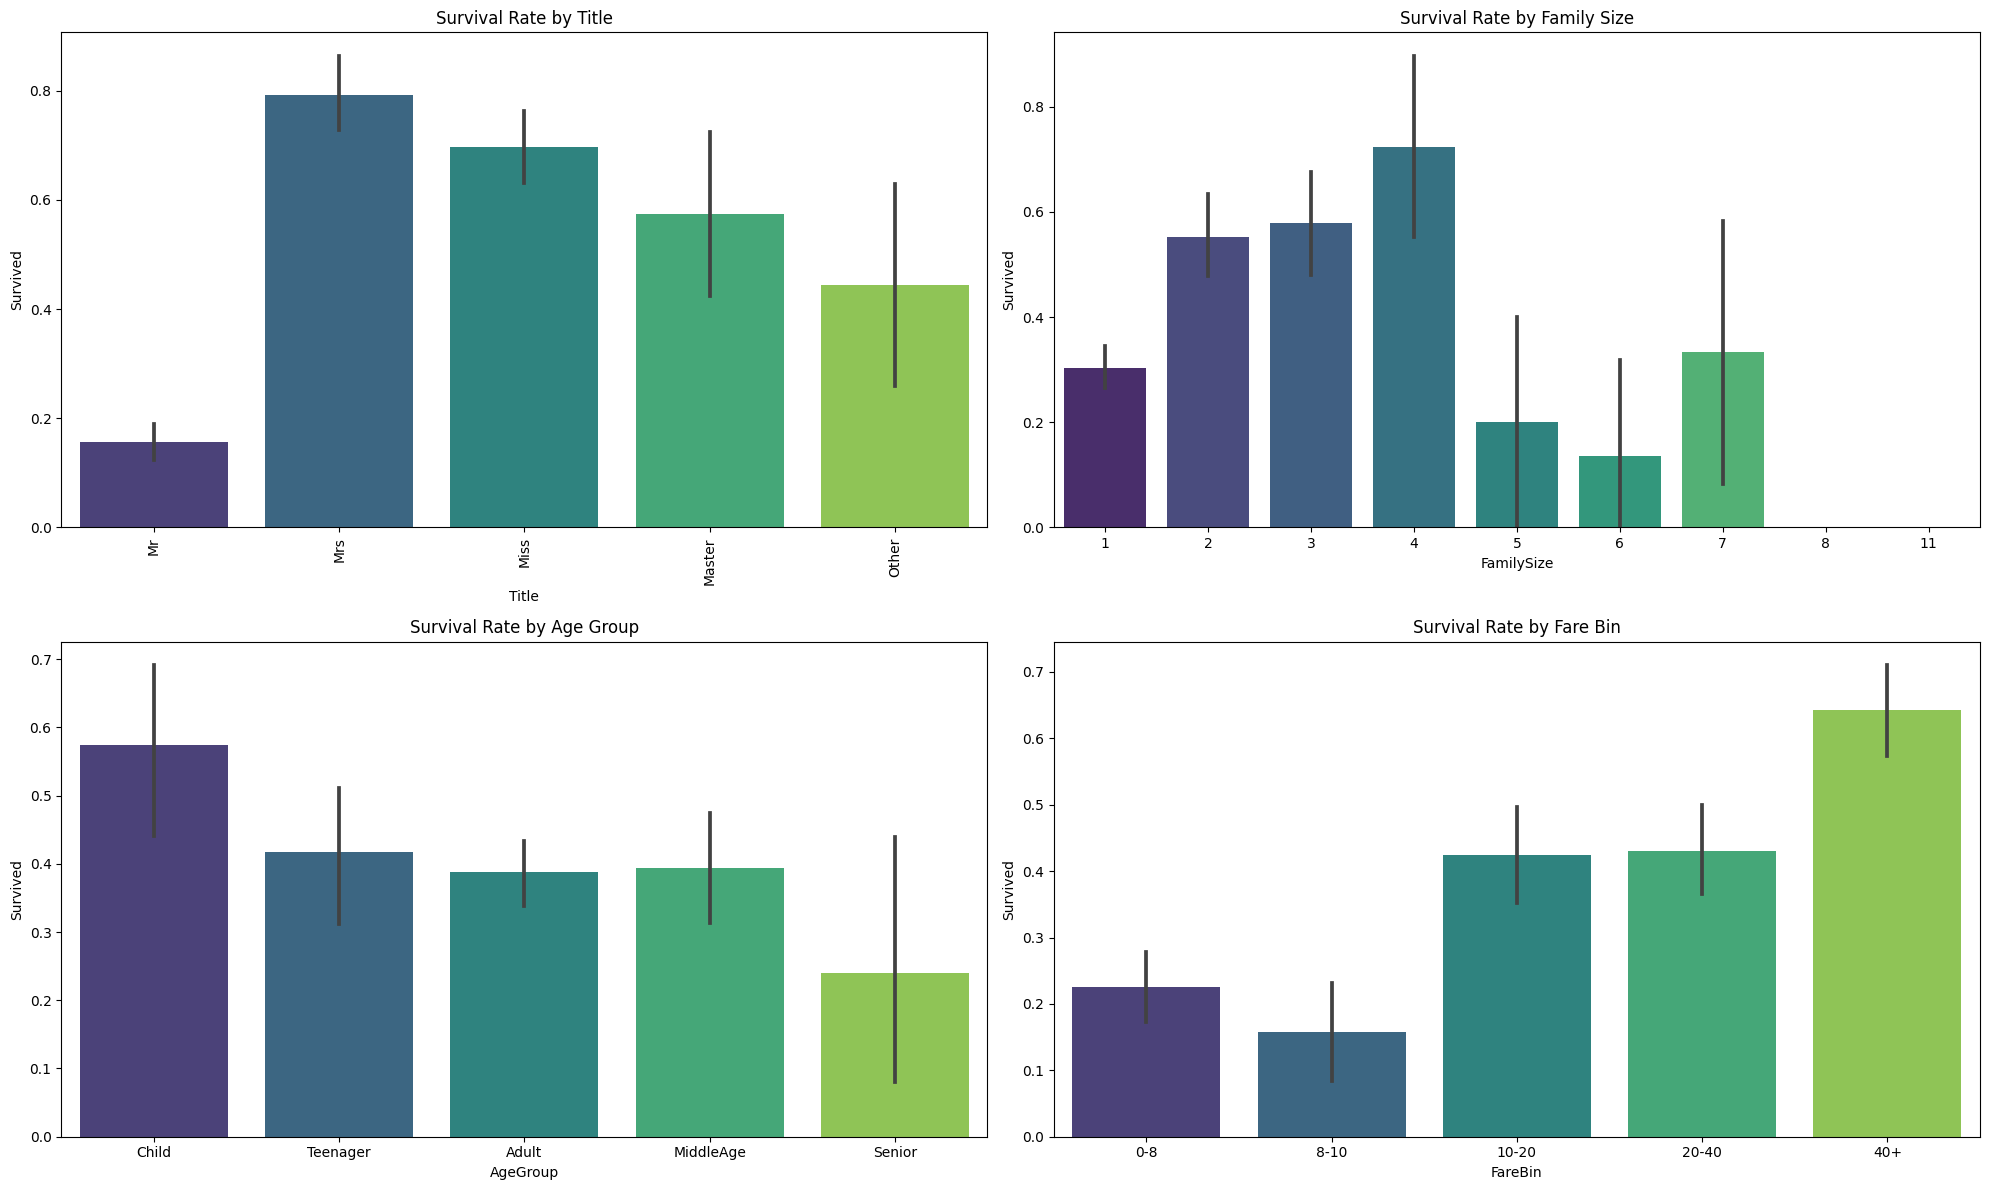

In [138]:
# Feature Engineering

# Extract Title from Name
titanic_data['Title'] = titanic_data['Name'].apply(lambda name: name.split(',')[1].split('.')[0].strip())

titanic_data['Title']=np.where(titanic_data['Title'].isin(['Mr','Miss','Mrs','Master']),titanic_data['Title'],'Other')

# Create FamilySize feature
titanic_data['FamilySize'] = titanic_data['SibSp'] + titanic_data['Parch'] + 1

# Create AgeGroup feature
bins = [0, 12, 20, 40, 60, 80]
labels = ['Child', 'Teenager', 'Adult', 'MiddleAge', 'Senior']
titanic_data['AgeGroup'] = pd.cut(titanic_data['Age'], bins=bins, labels=labels, right=False)

# Create FareBin feature
bin_edges=[0,8,10,20,40,1000]
bin_names=['0-8','8-10','10-20','20-40','40+']
titanic_data['FareBin']=pd.cut(titanic_data['Fare'],bins=bin_edges,labels=bin_names)

# Visualize new features

# Set up a grid of plots
fig = plt.figure(figsize=(20, 12)) 
fig_dims = (2, 2)

# Plot Title vs Survived
plt.subplot2grid(fig_dims, (0, 0))
sns.barplot(x='Title', y='Survived', data=titanic_data, palette='viridis')
plt.title('Survival Rate by Title')
plt.xticks(rotation=90)

# Plot FamilySize vs Survived
plt.subplot2grid(fig_dims, (0, 1))
sns.barplot(x='FamilySize', y='Survived', data=titanic_data, palette='viridis')
plt.title('Survival Rate by Family Size')

# Plot AgeGroup vs Survived
plt.subplot2grid(fig_dims, (1, 0))
sns.barplot(x='AgeGroup', y='Survived', data=titanic_data, palette='viridis')
plt.title('Survival Rate by Age Group')

# Plot FareBin vs Survived
plt.subplot2grid(fig_dims, (1, 1))
sns.barplot(x='FareBin', y='Survived', data=titanic_data, palette='viridis')
plt.title('Survival Rate by Fare Bin')

plt.tight_layout()
plt.show()


The bar plots for the new features provide the following insights:

- Survival Rate by Title: Passengers with titles 'Mrs', 'Miss', 'Master', and 'the Countess' had higher survival rates. Most of these titles are associated with females or children, which is consistent with our earlier observations.

- Survival Rate by Family Size: Passengers with a family size of 2 to 4 had the highest survival rate. Passengers who were alone (FamilySize = 1) or with a large family (FamilySize > 4) had lower survival rates.

- Survival Rate by Age Group: Children had the highest survival rate, followed by Adults and Teenagers. Seniors had the lowest survival rate.

- Survival Rate by Fare Bin: Passengers who paid higher fares had higher survival rates. This is consistent with our earlier observation that 'Fare' has a positive correlation with 'Survived'.

#### Pre-processing

- Now, let's handle missing values. As we discussed earlier, we'll impute missing values in 'Age' with the median, 'Embarked' with the most frequent category, 
- drop the 'Cabin' column due to the high number of missing values. 
- We'll also drop the 'Name' and 'Ticket' columns as they are unlikely to provide any predictive power. 
- We'll convert 'Sex', 'Embarked', 'Title', 'AgeGroup', and 'FareBin' into numeric values using one-hot encoding. 
- The 'PassengerId' column will also be dropped as it doesn't contain any meaningful information for predicting survival.

In [139]:
titanic_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'log_Fare', 'Title',
       'FamilySize', 'AgeGroup', 'FareBin'],
      dtype='object')

In [140]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

# Impute missing values
imputer_age = SimpleImputer(strategy='median')
titanic_data['Age'] = imputer_age.fit_transform(titanic_data['Age'].values.reshape(-1, 1))


titanic_data['Embarked'] = np.where(titanic_data['Embarked'].isnull(), 'S', titanic_data['Embarked'])

# Drop columns with high number of missing values and columns that are not useful
titanic_data = titanic_data.drop(['Cabin', 'Name', 'Ticket', 'PassengerId'], axis=1)

# Convert categorical variables into numeric variables using one-hot encoding
encoder = OneHotEncoder(drop='first')
categorical_features = ['Sex', 'Embarked', 'Title', 'AgeGroup', 'FareBin']
encoded_features = pd.get_dummies(titanic_data[categorical_features])

# Drop original categorical features and add the encoded features
titanic_data = titanic_data.drop(categorical_features, axis=1)
titanic_data = pd.concat([titanic_data, encoded_features], axis=1)

# Show the processed data
titanic_data.head()


,Survived,Pclass,Age,SibSp,Parch,Fare,log_Fare,FamilySize,Sex_female,Sex_male,...,AgeGroup_Child,AgeGroup_Teenager,AgeGroup_Adult,AgeGroup_MiddleAge,AgeGroup_Senior,FareBin_0-8,FareBin_8-10,FareBin_10-20,FareBin_20-40,FareBin_40+
0,0,3,22.0,1,0,7.2500,2.110213,2,False,True,...,False,False,True,False,False,True,False,False,False,False
1,1,1,38.0,1,0,71.2833,4.280593,2,True,False,...,False,False,True,False,False,False,False,False,False,True
2,1,3,26.0,0,0,7.9250,2.188856,1,True,False,...,False,False,True,False,False,True,False,False,False,False
3,1,1,35.0,1,0,53.1000,3.990834,2,True,False,...,False,False,True,False,False,False,False,False,False,True
4,0,3,35.0,0,0,8.0500,2.202765,1,False,True,...,False,False,True,False,False,False,True,False,False,False


In [141]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

# Split data into features (X) and target (y)
X = titanic_data.drop('Survived', axis=1)
y = titanic_data['Survived']

# Split data into training set and validation set
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.columns = X_train.columns.str.replace("[", "_", regex=False)
X_train.columns = X_train.columns.str.replace("]", "_", regex=False)
X_train.columns = X_train.columns.str.replace("<", "_", regex=False)

X_val.columns = X_val.columns.str.replace("[", "_", regex=False)
X_val.columns = X_val.columns.str.replace("]", "_", regex=False)
X_val.columns = X_val.columns.str.replace("<", "_", regex=False)

# Initialize models
models = [
    ('LogisticRegression', LogisticRegression(max_iter=1000)),
    ('KNeighborsClassifier', KNeighborsClassifier()),
    ('GaussianNB', GaussianNB()),
    ('DecisionTreeClassifier', DecisionTreeClassifier()),
    ('RandomForestClassifier', RandomForestClassifier()),
    ('AdaBoostClassifier', AdaBoostClassifier()),
    ('BaggingClassifier', BaggingClassifier()),
    ('GradientBoostingClassifier', GradientBoostingClassifier()),
    ('XGBClassifier', XGBClassifier(use_label_encoder=False, eval_metric='logloss')),
    ('SVC', SVC(probability=True))
]

# Train and evaluate models
model_names = []
accuracies = []
train_accuracies=[]
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    y_pred_train=model.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_pred_train)
    accuracy = accuracy_score(y_val, y_pred)
    model_names.append(name)
    accuracies.append(accuracy)
    train_accuracies.append(train_accuracy)

model_performance = pd.DataFrame({'Model': model_names, 'Train Accuracy':train_accuracies, 'Test Accuracy':accuracies})
model_performance


,Model,Train Accuracy,Test Accuracy
0,LogisticRegression,0.838483,0.810056
1,KNeighborsClassifier,0.804775,0.726257
2,GaussianNB,0.810393,0.776536
3,DecisionTreeClassifier,0.983146,0.798883
4,RandomForestClassifier,0.981742,0.837989
5,AdaBoostClassifier,0.845506,0.804469
6,BaggingClassifier,0.974719,0.815642
7,GradientBoostingClassifier,0.910112,0.804469
8,XGBClassifier,0.973315,0.815642
9,SVC,0.688202,0.670391


In [142]:
# Stacking
stacking_model = StackingClassifier(
    estimators=models, 
    final_estimator=LogisticRegression(),
    n_jobs=1
)

stacking_model.fit(X_train, y_train)
y_pred = stacking_model.predict(X_val)
stacking_accuracy = accuracy_score(y_val, y_pred)
y_pred_train=stacking_model.predict(X_train)
stacking_accuracy_train = accuracy_score(y_train, y_pred_train)

print(stacking_accuracy_train)
print(stacking_accuracy)

0.9002808988764045
0.8100558659217877


Best: 0.827713 using {'C': 0.1, 'max_iter': 10000, 'penalty': 'l2', 'solver': 'newton-cg'}


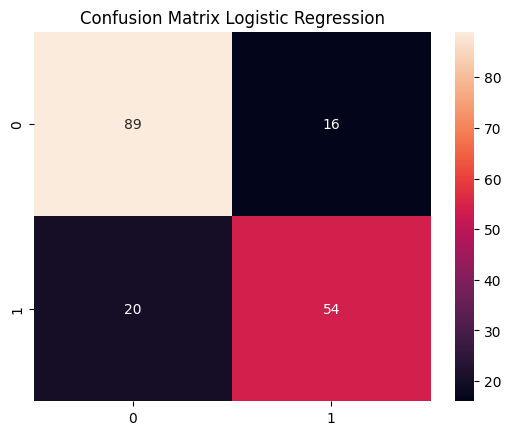

Model : Logistic Regression
Best parameters : {'C': 0.1, 'max_iter': 10000, 'penalty': 'l2', 'solver': 'newton-cg'}
Accuracy score (training): 83.57
Accuracy score (validation): 79.89
Precision score : 77.14
Recall score : 72.97
F1 score : 75.0


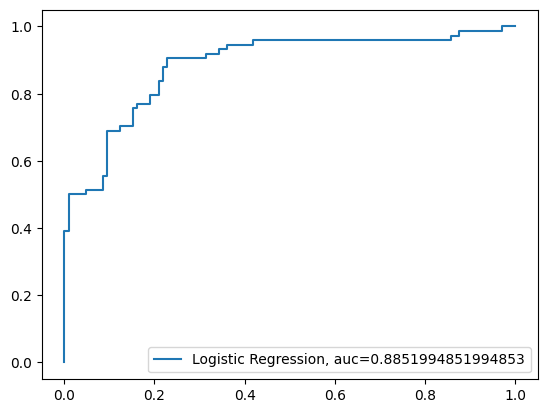

ROC AUC score : 88.52


In [143]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


# define models and parameters
model_logreg = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

# define grid search

grid_logreg = dict(solver=solvers,penalty=penalty,C=c_values, max_iter=[10000])

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

grid_search_logreg = GridSearchCV(estimator=model_logreg, param_grid=grid_logreg, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0, verbose=0)

grid_result_logreg = grid_search_logreg.fit(X_train, y_train)

# summarize results
print("Best: %f using %s" % (grid_result_logreg.best_score_, grid_result_logreg.best_params_))
means = grid_result_logreg.cv_results_['mean_test_score']
stds = grid_result_logreg.cv_results_['std_test_score']
params = grid_result_logreg.cv_results_['params']
#for mean, stdev, param in zip(means, stds, params):
#    print("%f (%f) with: %r" % (mean, stdev, param))

#predicting using the best parameters - Train
y_pred_logreg_best_train = grid_result_logreg.best_estimator_.predict(X_train)

y_pred_logreg_best = grid_result_logreg.best_estimator_.predict(X_val)

#plotting the confusion matrix
from sklearn.metrics import confusion_matrix
cm_logreg_best = confusion_matrix(y_val, y_pred_logreg_best)
sns.heatmap(cm_logreg_best, annot=True, fmt="d")
plt.title(f"Confusion Matrix Logistic Regression")
plt.savefig('../Assets/cm_logreg_best.png')
plt.show()

#accuracy score
accuracy_train_logreg_best = round(grid_result_logreg.best_estimator_.score(X_train, y_train) * 100, 2)
accuracy_test_logreg_best = round(accuracy_score(y_val, y_pred_logreg_best) * 100, 2)
precision_test_logreg_best = round(precision_score(y_val, y_pred_logreg_best) * 100, 2)
recall_test_logreg_best = round(recall_score(y_val, y_pred_logreg_best) * 100, 2)
f1_score_test_logreg_best = round(f1_score(y_val, y_pred_logreg_best) * 100, 2)
roc_auc_score_logreg_best = round(roc_auc_score(y_val, y_pred_logreg_best) * 100, 2)

logreg_best_results = pd.DataFrame([['Logistic Regression', grid_result_logreg.best_params_, accuracy_train_logreg_best, accuracy_test_logreg_best, precision_test_logreg_best, recall_test_logreg_best, f1_score_test_logreg_best, roc_auc_score_logreg_best]])

print("Model : Logistic Regression")
print("Best parameters :",grid_result_logreg.best_params_)
print("Accuracy score (training):",accuracy_train_logreg_best)
print("Accuracy score (validation):",accuracy_test_logreg_best)
print("Precision score :",precision_test_logreg_best)
print("Recall score :",recall_test_logreg_best)
print("F1 score :",f1_score_test_logreg_best)

#plotting the roc curve
from sklearn.metrics import roc_curve

y_pred_proba_logreg_best = grid_result_logreg.best_estimator_.predict_proba(X_val)[::,1]
fpr_logreg_best, tpr_logreg_best, _ = roc_curve(y_val,  y_pred_proba_logreg_best)
auc_logreg_best = roc_auc_score(y_val, y_pred_proba_logreg_best)
plt.plot(fpr_logreg_best,tpr_logreg_best,label="Logistic Regression, auc="+str(auc_logreg_best))
plt.legend(loc=4)
plt.savefig('../Assets/roc_logreg_best.png')
plt.show()

roc_auc_score_logreg_best = round(roc_auc_score(y_val, y_pred_proba_logreg_best) * 100, 2)
print("ROC AUC score :",roc_auc_score_logreg_best)



In [144]:
#let's save the model using joblib, the metrics and the images 

import joblib
joblib.dump(grid_result_logreg.best_estimator_, '../Models/model_logreg_best.joblib')

#save all the metrics in a json file

import json
data = {}
data['model'] = []
data['model'].append({
    'model_name': 'Logistic Regression',
    'best_parameters': grid_result_logreg.best_params_,
    'accuracy_score_train': accuracy_train_logreg_best,
    'accuracy_score_test': accuracy_test_logreg_best,
    'precision_score_test': precision_test_logreg_best,
    'recall_score_test': recall_test_logreg_best,
    'f1_score_test': f1_score_test_logreg_best,
    'roc_auc_score_test': roc_auc_score_logreg_best
})

with open('../Data/metrics_logreg.json', 'w') as outfile:
    json.dump(data, outfile)


Best: 0.832872 using {'bootstrap': True, 'max_depth': 80, 'max_features': 4, 'min_samples_leaf': 3, 'min_samples_split': 12, 'n_estimators': 100}


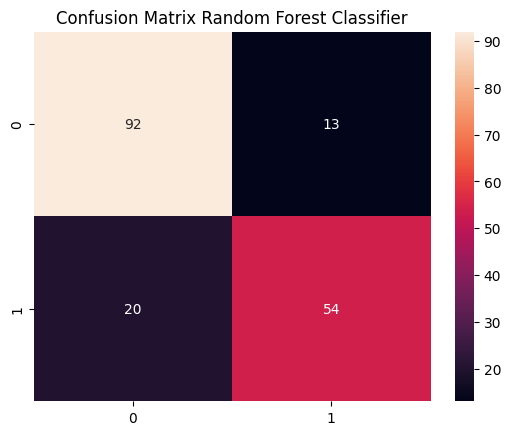

Model : Random Forest Classifier
Accuracy score (training): 86.66
Accuracy score (validation): 81.56
Precision score : 80.6
Recall score : 72.97
F1 score : 76.6


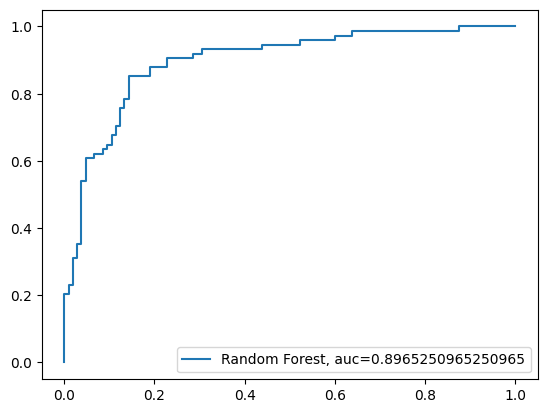

ROC AUC score : 89.65


In [145]:

from sklearn.model_selection import GridSearchCV

rfc = RandomForestClassifier(random_state=42)

param_grid_rfc = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3, 4, 5],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

grid_search_rfc = GridSearchCV(estimator = rfc, param_grid = param_grid_rfc,
                            cv = 3, n_jobs = -1, verbose = 0)

grid_result_rfc = grid_search_rfc.fit(X_train, y_train)

print("Best: %f using %s" % (grid_result_rfc.best_score_, grid_result_rfc.best_params_))

#predicting using the model

y_pred_rfc_best = grid_result_rfc.best_estimator_.predict(X_val)

#plotting the confusion matrix

from sklearn.metrics import confusion_matrix

cm_rfc_best = confusion_matrix(y_val, y_pred_rfc_best)
sns.heatmap(cm_rfc_best, annot=True, fmt="d")
plt.title(f"Confusion Matrix Random Forest Classifier")
plt.savefig('../Assets/cm_rfc_best.png')
plt.show()

#accuracy score
accuracy_train_rfc_best = round(grid_result_rfc.best_estimator_.score(X_train, y_train) * 100, 2)
accuracy_test_rfc_best = round(accuracy_score(y_val, y_pred_rfc_best) * 100, 2)
precision_test_rfc_best = round(precision_score(y_val, y_pred_rfc_best) * 100, 2)
recall_test_rfc_best = round(recall_score(y_val, y_pred_rfc_best) * 100, 2)
f1_score_test_rfc_best = round(f1_score(y_val, y_pred_rfc_best) * 100, 2)

print("Model : Random Forest Classifier")
print("Accuracy score (training):",accuracy_train_rfc_best)
print("Accuracy score (validation):",accuracy_test_rfc_best)
print("Precision score :",precision_test_rfc_best)
print("Recall score :",recall_test_rfc_best)
print("F1 score :",f1_score_test_rfc_best)

#plotting the roc curve
from sklearn.metrics import roc_curve

y_pred_proba_rfc_best = grid_result_rfc.best_estimator_.predict_proba(X_val)[::,1]
fpr_rfc_best, tpr_rfc_best, _ = roc_curve(y_val,  y_pred_proba_rfc_best)
auc_rfc_best = roc_auc_score(y_val, y_pred_proba_rfc_best)
plt.plot(fpr_rfc_best,tpr_rfc_best,label="Random Forest, auc="+str(auc_rfc_best))
plt.legend(loc=4)
plt.savefig('../Assets/roc_rfc_best.png')
plt.show()

roc_auc_score_rfc_best = round(roc_auc_score(y_val, y_pred_proba_rfc_best) * 100, 2)
print("ROC AUC score :",roc_auc_score_rfc_best)



In [146]:
#let's save the model using joblib, the metrics and the images 

import joblib
joblib.dump(grid_result_rfc.best_estimator_, '../Models/model_rfc_best.joblib')

#save all the metrics in a json file

import json
data = {}
data['model'] = []
data['model'].append({
    'model_name': 'Random Forest Classifier',
    'best_parameters': grid_result_rfc.best_params_,
    'accuracy_score_train': accuracy_train_rfc_best,
    'accuracy_score_test': accuracy_test_rfc_best,
    'precision_score_test': precision_test_rfc_best,
    'recall_score_test': recall_test_rfc_best,
    'f1_score_test': f1_score_test_rfc_best,
    'roc_auc_score_test': roc_auc_score_rfc_best
})

with open('../Data/metrics_rfc.json', 'w') as outfile:
    json.dump(data, outfile)


Best: 0.8440953412784399 using {'colsample_bytree': 0.3, 'gamma': 0.25, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100, 'reg_lambda': 0.1}


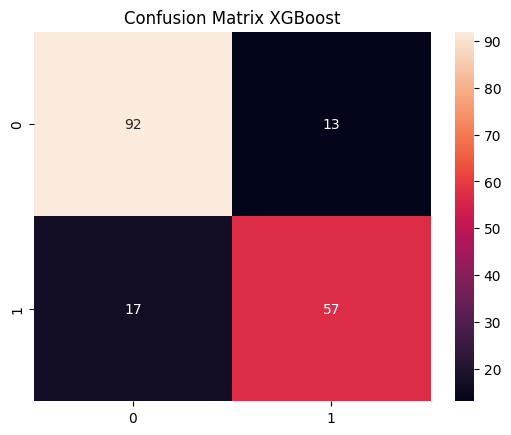

Model : XGBoost Classifier with hyperparameter tuning
Accuracy score (training): 85.96
Accuracy score (validation): 83.24
Precision score : 81.43
Recall score : 77.03
F1 score : 79.17


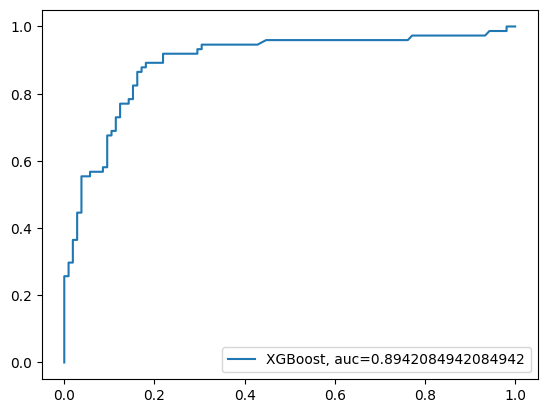

ROC AUC score : 89.42


In [147]:

from sklearn.model_selection import GridSearchCV

xgb = XGBClassifier()

param_grid_xgb = {
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2],
    'gamma': [0, 0.25, 0.5, 1.0],
    'reg_lambda': [0.1, 1.0, 5.0, 10.0],
    'colsample_bytree': [0.3, 0.6, 0.8, 1.0],
    'n_estimators': [100]
}

grid_xgb = GridSearchCV(estimator=xgb, param_grid=param_grid_xgb, cv=5, n_jobs=-1)
grid_result_xgb = grid_xgb.fit(X_train, y_train)

print(f"Best: {grid_result_xgb.best_score_} using {grid_result_xgb.best_params_}")

y_pred_xgb_best = grid_result_xgb.best_estimator_.predict(X_val)

#plotting the confusion matrix

from sklearn.metrics import confusion_matrix

cm_xgb_best = confusion_matrix(y_val, y_pred_xgb_best)
sns.heatmap(cm_xgb_best, annot=True, fmt="d")
plt.title(f"Confusion Matrix XGBoost")
plt.savefig('../Assets/cm_xgb_best.png')
plt.show()

#accuracy score

accuracy_train_xgb_best = round(grid_result_xgb.best_estimator_.score(X_train, y_train) * 100, 2)
accuracy_test_xgb_best = round(accuracy_score(y_val, y_pred_xgb_best) * 100, 2)
precision_test_xgb_best = round(precision_score(y_val, y_pred_xgb_best) * 100, 2)
recall_test_xgb_best = round(recall_score(y_val, y_pred_xgb_best) * 100, 2)
f1_score_test_xgb_best = round(f1_score(y_val, y_pred_xgb_best) * 100, 2)

print("Model : XGBoost Classifier with hyperparameter tuning")
print("Accuracy score (training):",accuracy_train_xgb_best)
print("Accuracy score (validation):",accuracy_test_xgb_best)
print("Precision score :",precision_test_xgb_best)
print("Recall score :",recall_test_xgb_best)
print("F1 score :",f1_score_test_xgb_best)

#plotting the roc curve

from sklearn.metrics import roc_curve

y_pred_proba_xgb_best = grid_result_xgb.best_estimator_.predict_proba(X_val)[::,1]
fpr_xgb_best, tpr_xgb_best, _ = roc_curve(y_val,  y_pred_proba_xgb_best)
auc_xgb_best = roc_auc_score(y_val, y_pred_proba_xgb_best)
plt.plot(fpr_xgb_best,tpr_xgb_best,label="XGBoost, auc="+str(auc_xgb_best))
plt.legend(loc=4)
plt.savefig('../Assets/roc_xgb_best.png')

plt.show()

roc_auc_score_xgb_best = round(roc_auc_score(y_val, y_pred_proba_xgb_best) * 100, 2)

print("ROC AUC score :",roc_auc_score_xgb_best)


In [148]:
#let's save the model using joblib, the metrics and the images 

import joblib
joblib.dump(grid_result_xgb.best_estimator_, '../Models/model_xgb_best.joblib')

#save all the metrics in a json file

import json
data = {}
data['model'] = []
data['model'].append({
    'model_name': 'XGB Classifier',
    'best_parameters': grid_result_xgb.best_params_,
    'accuracy_score_train': accuracy_train_xgb_best,
    'accuracy_score_test': accuracy_test_xgb_best,
    'precision_score_test': precision_test_xgb_best,
    'recall_score_test': recall_test_xgb_best,
    'f1_score_test': f1_score_test_xgb_best,
    'roc_auc_score_test': roc_auc_score_xgb_best
})

with open('../Data/metrics_xgb.json', 'w') as outfile:
    json.dump(data, outfile)


Best: 0.8426474933517187 using {'max_features': 0.2, 'max_samples': 0.4, 'n_estimators': 100}


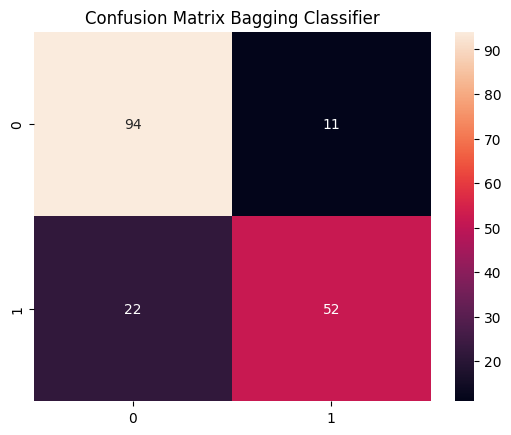

Model : Bagging Classifier
Accuracy score (training): 90.31
Accuracy score (validation): 81.56
Precision score : 82.54
Recall score : 70.27
F1 score : 75.91


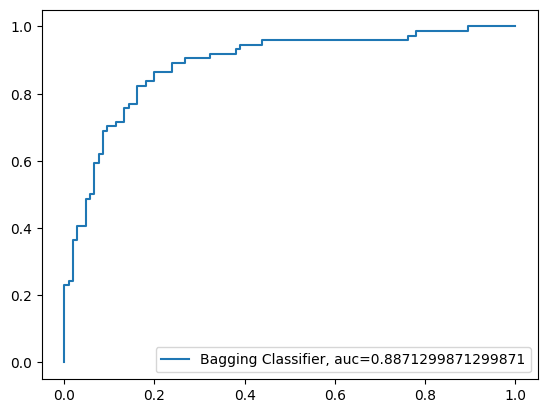

ROC AUC score : 88.71


In [149]:
#hyperparameter tuning

from sklearn.model_selection import GridSearchCV

bc = BaggingClassifier()

param_grid_bc = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_samples': [0.1, 0.2, 0.3, 0.4, 0.5],
    'max_features': [0.1, 0.2, 0.3, 0.4, 0.5]
}


grid_bc = GridSearchCV(bc, param_grid_bc, cv=5, verbose=0, n_jobs=-1)
grid_result_bc = grid_bc.fit(X_train, y_train)

print(f"Best: {grid_result_bc.best_score_} using {grid_result_bc.best_params_}")

#best estimator

bc_best = grid_bc.best_estimator_

y_pred_bc_best = bc_best.predict(X_val)

#plotting the confusion matrix

from sklearn.metrics import confusion_matrix

cm_bc_best = confusion_matrix(y_val, y_pred_bc_best)
sns.heatmap(cm_bc_best, annot=True, fmt="d")
plt.title(f"Confusion Matrix Bagging Classifier")
plt.savefig('../Assets/cm_bc_best.png')


plt.show()

#accuracy score

accuracy_train_bc_best = round(bc_best.score(X_train, y_train) * 100, 2)
accuracy_test_bc_best = round(accuracy_score(y_val, y_pred_bc_best) * 100, 2)
precision_test_bc_best = round(precision_score(y_val, y_pred_bc_best) * 100, 2)
recall_test_bc_best = round(recall_score(y_val, y_pred_bc_best) * 100, 2)
f1_score_test_bc_best = round(f1_score(y_val, y_pred_bc_best) * 100, 2)

print("Model : Bagging Classifier")
print("Accuracy score (training):",accuracy_train_bc_best)
print("Accuracy score (validation):",accuracy_test_bc_best)
print("Precision score :",precision_test_bc_best)
print("Recall score :",recall_test_bc_best)
print("F1 score :",f1_score_test_bc_best)

#plotting the roc curve

from sklearn.metrics import roc_curve

y_pred_proba_bc_best = bc_best.predict_proba(X_val)[::,1]

fpr_bc_best, tpr_bc_best, _ = roc_curve(y_val,  y_pred_proba_bc_best)

auc_bc_best = roc_auc_score(y_val, y_pred_proba_bc_best)

plt.plot(fpr_bc_best,tpr_bc_best,label="Bagging Classifier, auc="+str(auc_bc_best))

plt.legend(loc=4)

plt.savefig('../Assets/roc_bc_best.png')


plt.show()

print("ROC AUC score :",round(roc_auc_score(y_val, y_pred_proba_bc_best) * 100, 2))


In [150]:
#let's save the model using joblib, the metrics and the images 

import joblib
joblib.dump(grid_bc.best_estimator_, '../Models/model_bc_best.joblib')

#save all the metrics in a json file

import json
data = {}
data['model'] = []
data['model'].append({
    'model_name': 'Bagging Classifier',
    'best_parameters': grid_bc.best_params_,
    'accuracy_score_train': accuracy_train_bc_best,
    'accuracy_score_test': accuracy_test_bc_best,
    'precision_score_test': precision_test_bc_best,
    'recall_score_test': recall_test_bc_best,
    'f1_score_test': f1_score_test_bc_best,
    'roc_auc_score_test': auc_bc_best
})

with open('../Data/metrics_bc.json', 'w') as outfile:
    json.dump(data, outfile)

In [151]:
Fare = 40
Title = 'Miss'
SibSp= 1
Parch = 2
Age = 43
Embarked= 'S'
Sex='Female'
Pclass=1

In [152]:
X_train.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'log_Fare', 'FamilySize',
       'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S',
       'Title_Master', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Other',
       'AgeGroup_Child', 'AgeGroup_Teenager', 'AgeGroup_Adult',
       'AgeGroup_MiddleAge', 'AgeGroup_Senior', 'FareBin_0-8', 'FareBin_8-10',
       'FareBin_10-20', 'FareBin_20-40', 'FareBin_40+'],
      dtype='object')

In [153]:
example_df = pd.DataFrame(columns=X_train.columns,index=[0])

In [154]:
example_df.log_Fare=np.log(Fare+1)

In [155]:
example_df.FamilySize = SibSp + Parch + 1

In [156]:
example_df

,Pclass,Age,SibSp,Parch,Fare,log_Fare,FamilySize,Sex_female,Sex_male,Embarked_C,...,AgeGroup_Child,AgeGroup_Teenager,AgeGroup_Adult,AgeGroup_MiddleAge,AgeGroup_Senior,FareBin_0-8,FareBin_8-10,FareBin_10-20,FareBin_20-40,FareBin_40+
0,NaN,NaN,NaN,NaN,NaN,3.713572,4,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [157]:
if Sex=='Male':
    example_df.Sex_male=1
    example_df.Sex_female=0
else:
    example_df.Sex_male=0
    example_df.Sex_female=1

if Embarked=='S':
    example_df.Embarked_S=1
    example_df.Embarked_C=0
    example_df.Embarked_Q=0
elif Embarked=='C':
    example_df.Embarked_S=0
    example_df.Embarked_C=1
    example_df.Embarked_Q=0
else:
    example_df.Embarked_S=0
    example_df.Embarked_C=0
    example_df.Embarked_Q=1

if Title=='Mr':
    example_df.Title_Mr=1
    example_df.Title_Mrs=0
    example_df.Title_Miss=0
    example_df.Title_Master=0
    example_df.Title_Other=0
elif Title=='Mrs':
    example_df.Title_Mr=0
    example_df.Title_Mrs=1
    example_df.Title_Miss=0
    example_df.Title_Master=0
    example_df.Title_Other=0
elif Title=='Miss':
    example_df.Title_Mr=0
    example_df.Title_Mrs=0
    example_df.Title_Miss=1
    example_df.Title_Master=0
    example_df.Title_Other=0
elif Titl=='Master':
    example_df.Title_Mr=0
    example_df.Title_Mrs=0
    example_df.Title_Miss=0
    example_df.Title_Master=1
    example_df.Title_Other=0
else:
    example_df.Title_Mr=0
    example_df.Title_Mrs=0
    example_df.Title_Miss=0
    example_df.Title_Master=0
    example_df.Title_Other=1

if Age<12:
    example_df.AgeGroup_Child=1
    example_df.AgeGroup_Teenager=0
    example_df.AgeGroup_Adult=0
    example_df.AgeGroup_MiddleAge=0
    example_df.AgeGroup_Senior=0
elif Age<20:
    example_df.AgeGroup_Child=0
    example_df.AgeGroup_Teenager=1
    example_df.AgeGroup_Adult=0
    example_df.AgeGroup_MiddleAge=0
    example_df.AgeGroup_Senior=0
elif Age<40:
    example_df.AgeGroup_Child=0
    example_df.AgeGroup_Teenager=0
    example_df.AgeGroup_Adult=1
    example_df.AgeGroup_MiddleAge=0
    example_df.AgeGroup_Senior=0
elif Age<60:
    example_df.AgeGroup_Child=0
    example_df.AgeGroup_Teenager=0
    example_df.AgeGroup_Adult=0
    example_df.AgeGroup_MiddleAge=1
    example_df.AgeGroup_Senior=0
else:
    example_df.AgeGroup_Child=0
    example_df.AgeGroup_Teenager=0
    example_df.AgeGroup_Adult=0
    example_df.AgeGroup_MiddleAge=0
    example_df.AgeGroup_Senior=1

if Fare<8:
    example_df['FareBin_0-8']=1
    example_df['FareBin_8-10']=0
    example_df['FareBin_10-20']=0
    example_df['FareBin_20-40']=0
    example_df['FareBin_40+']=0
elif Fare<10:
    example_df['FareBin_0-8']=0
    example_df['FareBin_8-10']=1
    example_df['FareBin_10-20']=0
    example_df['FareBin_20-40']=0
    example_df['FareBin_40+']=0
elif Fare<20:
    example_df['FareBin_0-8']=0
    example_df['FareBin_8-10']=0
    example_df['FareBin_10-20']=1
    example_df['FareBin_20-40']=0
    example_df['FareBin_40+']=0
elif Fare<40:
    example_df['FareBin_0-8']=0
    example_df['FareBin_8-10']=0
    example_df['FareBin_10-20']=0
    example_df['FareBin_20-40']=1
    example_df['FareBin_40+']=0
else:
    example_df['FareBin_0-8']=0
    example_df['FareBin_8-10']=0
    example_df['FareBin_10-20']=0
    example_df['FareBin_20-40']=0
    example_df['FareBin_40+']=1
    
example_df.Age = Age
example_df.SibSp = SibSp
example_df.Parch = Parch
example_df.Pclass = Pclass
example_df.Fare = Fare







In [158]:
example_df

,Pclass,Age,SibSp,Parch,Fare,log_Fare,FamilySize,Sex_female,Sex_male,Embarked_C,...,AgeGroup_Child,AgeGroup_Teenager,AgeGroup_Adult,AgeGroup_MiddleAge,AgeGroup_Senior,FareBin_0-8,FareBin_8-10,FareBin_10-20,FareBin_20-40,FareBin_40+
0,1,43,1,2,40,3.713572,4,1,0,0,...,0,0,0,1,0,0,0,0,0,1


In [159]:
example_df.columns==X_train.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True])

In [165]:
model=joblib.load('../Models/model_bc_best.joblib')

prediction = model.predict(example_df)

# Get the survival probability
survival_probability = model.predict_proba(example_df)[:, 1]

# Map the prediction to the corresponding class label
prediction = 'Survived' if prediction == 1 else 'Did not survive'

prediction, survival_probability

('Survived', array([0.56265953]))

In [166]:
survival_probability = round(survival_probability[0]*100, 2)
survival_probability

56.27